Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
%matplotlib inline

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
Y = pd.DataFrame(boston['target'], columns = ['price'])
Y.head(5)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)


In [19]:
print('Before:\t{}'.format(X_train_scaled.shape))
print('After:\t{}'.format(X_train_tsne.shape))

Before:	(404, 13)
After:	(404, 2)


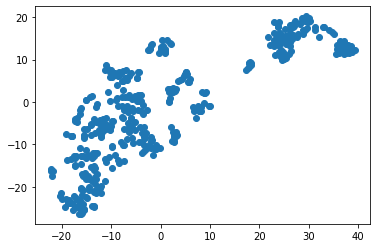

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

На графике видно, чо данные можно разделить минимум на 2 кластера

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [39]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

labels_train = kmeans.fit_predict(X_train)

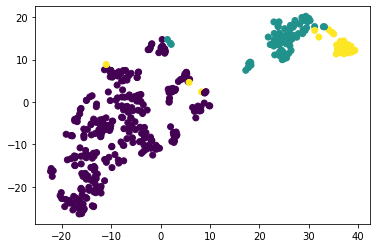

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [49]:
print('Средняя цена по Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Средняя цена по Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Средняя цена по Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Средняя цена по Кластер 0: price    25.168687
dtype: float64
Средняя цена по Кластер 1: price    17.442105
dtype: float64
Средняя цена по Кластер 2: price    13.196774
dtype: float64


In [32]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.40486282828282844
Кластер 1: 11.745661842105266
Кластер 2: 14.360380322580648


Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [36]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

labels_test = kmeans.fit_predict(X_test)

In [34]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_test_tsne = tsne.fit_transform(X_test_scaled)

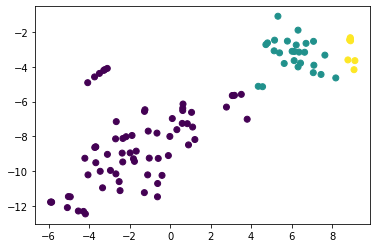

In [37]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [47]:
print('Средняя цена по Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Средняя цена по Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Средняя цена по Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

Средняя цена по Кластер 0: price    23.911594
dtype: float64
Средняя цена по Кластер 1: price    17.392308
dtype: float64
Средняя цена по Кластер 2: price    12.814286
dtype: float64


In [48]:
print('Среднее значение преступности по Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Среднее значение преступности по Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Среднее значение преступности по Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Среднее значение преступности по Кластер 0: 0.2464211594202899
Среднее значение преступности по Кластер 1: 8.469301923076923
Среднее значение преступности по Кластер 2: 19.021665714285714
